In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn import metrics
import warnings
warnings.simplefilter(action="ignore")

In [2]:
from google.colab import drive

In [3]:
df= pd.read_csv('/content/drive/MyDrive/Colab Notebooks/PDAC PROJECT/Dataset.csv')

In [4]:
df

Sample_Id patient_cohort sample_origin  age sex  diagnosis stage  \
0           S1        Cohort1          BPTB   33   F          1   NaN   
1          S10        Cohort1          BPTB   81   F          1   NaN   
2         S100        Cohort2          BPTB   51   M          1   NaN   
3         S101        Cohort2          BPTB   61   M          1   NaN   
4         S102        Cohort2          BPTB   62   M          1   NaN   
...        ...            ...           ...  ...  ..        ...   ...   
4994       NaN            NaN           NaN   55   M          1   NaN   
4995       NaN            NaN           NaN   50   F          1   NaN   
4996       NaN            NaN           NaN   46   M          1   NaN   
4997       NaN            NaN           NaN   61   F          1   NaN   
4998       NaN            NaN           NaN   48   M          1   NaN   

     benign_sample_diagnosis  plasma_CA19_9  creatinine     LYVE1      REG1B  \
0                        NaN       25.32100     1.83222  0.893219   52.94884   
1                        NaN       16.23600         NaN  2.037585   94.46703   
2                        NaN        7.26430     0.78039  0.145589  102.36600   
3                        NaN        8.13600     0.70122  0.002805   60.57900   
4                        NaN        9.56430     0.21489  0.000860   65.54000   
...                      ...            ...         ...       ...        ...   
4994                     NaN       25.16786     1.02921  0.091370   10.82857   
4995                     NaN       12.26300     0.20358  1.858508   12.09697   
4996                     NaN       14.23000     0.07917  1.344993   48.11963   
4997                     NaN        5.23200     1.53816  0.279427   54.96901   
4998                     NaN       25.16786     1.50423  0.004524  281.41368   

            TFF1     REG1A     CEA  CA125  HbA1c  
0     654.282174   126.000  0.8500   13.3   23.0  
1     209.488250   228.407  0.9100   11.1   46.0  
2     461.141000   352.000  1.8500   16.7   46.0  
3     142.950000  2611.000  1.2600   12.6   44.0  
4      41.088000   533.000  4.2300    7.4   39.0  
...          ...       ...     ...    ...    ...  
4994   39.729131    83.829  1.0020    6.0   41.0  
4995    0.014115   507.593  4.2015   23.5   49.0  
4996  324.669300  5248.320  0.5620  441.0   43.0  
4997  398.440050   654.265  1.9920   22.0   52.0  
4998  124.278000   598.000  3.9902  113.0   55.0  

[4999 rows x 17 columns]

In [5]:
df.replace({'sex':{'M':1,'F':2}},inplace=True)

In [6]:
X=df.drop(columns=['Sample_Id','patient_cohort','diagnosis', 'sample_origin','stage', 'benign_sample_diagnosis'])
Y=df['diagnosis']
X_train,X_test,Y_train,Y_test = train_test_split(X,Y,test_size=0.20,random_state=5)

In [7]:
print(df['age'].skew())
print(df['plasma_CA19_9'].skew())
print(df['creatinine'].skew())
print(df['LYVE1'].skew())
print(df['REG1B'].skew())
print(df['TFF1'].skew())
print(df['REG1A'].skew())
print(df['CEA'].skew())
print(df['CA125'].skew())
print(df['HbA1c'].skew())

-0.025650095371904578
8.489036780368716
1.8477212756007162
1.8814777517559624
4.895083471493078
9.227049679933186
4.064076193431994
15.171262778975672
8.266400247624873
5.15259021256772


In [8]:
print(df['plasma_CA19_9'].describe())

count     4981.000000
mean       311.124212
std       1226.588433
min          0.051565
25%          6.651000
50%         18.246000
75%         69.750000
max      18360.000000
Name: plasma_CA19_9, dtype: float64


percentile75 of  plasma_CA19_9= 69.75
prcentile25 of plasma_CA19_9= 6.651
iqr 63.099000000000004
Upper_limit 164.3985
Lower_limit -87.99750000000002
     Sample_Id patient_cohort sample_origin  age  sex  diagnosis stage  \
255       S188        Cohort1           LIV   59    1          2   NaN   
267       S200        Cohort1           LIV   66    1          2   NaN   
269       S202        Cohort1           LIV   42    1          2   NaN   
274       S207        Cohort1           LIV   64    1          2   NaN   
275       S208        Cohort1           LIV   64    1          2   NaN   
...        ...            ...           ...  ...  ...        ...   ...   
4492       NaN            NaN           NaN   54    1          2   NaN   
4493       NaN            NaN           NaN   68    1          2   NaN   
4494       NaN            NaN           NaN   54    2          2   NaN   
4495       NaN            NaN           NaN   54    2          2   NaN   
4497       NaN            NaN        

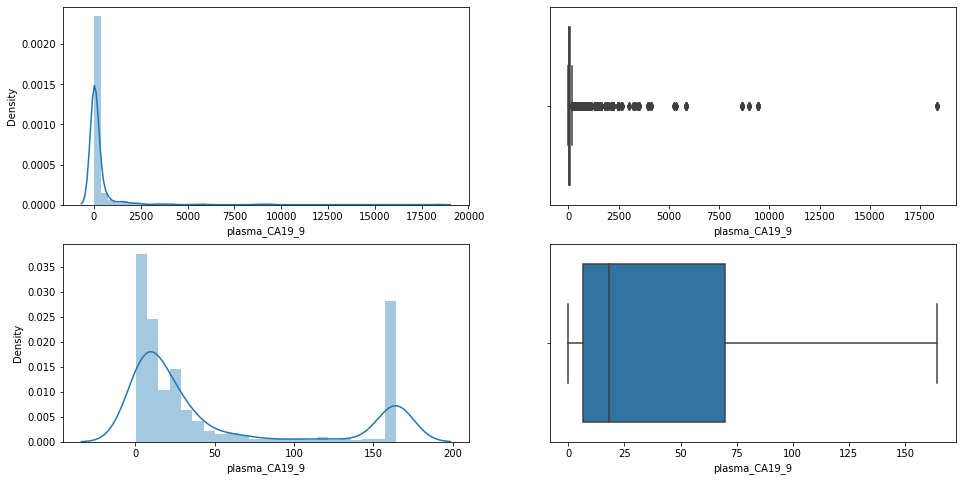

In [9]:
#plasma_CA19_9
#Finding the IQR value
percentile25=df['plasma_CA19_9'].quantile(0.25)
percentile75=df['plasma_CA19_9'].quantile(0.75)
print("percentile75 of  plasma_CA19_9=",percentile75)
print("prcentile25 of plasma_CA19_9=",percentile25)
iqr=percentile75 -percentile25
print("iqr",iqr)

upper_limit=percentile75+1.5*iqr
lower_limit=percentile25-1.5*iqr

print("Upper_limit",upper_limit)
print("Lower_limit",lower_limit)

#finding outliers
print(df[df['plasma_CA19_9']>upper_limit])

#Capping
new_df_cap=df.copy()
new_df_cap['plasma_CA19_9']=np.where(
    new_df_cap['plasma_CA19_9']>upper_limit,
    upper_limit,
    np.where(
        new_df_cap['plasma_CA19_9']<lower_limit,
        lower_limit,
        new_df_cap['plasma_CA19_9']
        )
    )

new_df_cap.shape
#Comparing
plt.figure(figsize=(16,8))
plt.subplot(2,2,1)
sns.distplot(df['plasma_CA19_9'])
plt.subplot(2,2,2)
sns.boxplot(df['plasma_CA19_9'])
plt.subplot(2,2,3)
sns.distplot(new_df_cap['plasma_CA19_9'])
plt.subplot(2,2,4)
sns.boxplot(new_df_cap['plasma_CA19_9'])
plt.show()

In [10]:
print(df['creatinine'].describe())

count    4970.000000
mean        0.843572
std         0.648100
min         0.056550
25%         0.350610
50%         0.735150
75%         1.131000
max         5.360000
Name: creatinine, dtype: float64


percentile75 of  creatinine= 1.131
prcentile25 of creatinine= 0.35061
iqr 0.78039
Upper_limit 2.301585
Lower_limit -0.819975
percentile75 of  creatinine= 1.131
prcentile25 of creatinine= 0.35061
iqr 0.78039
Upper_limit 2.301585
Lower_limit -0.819975
     Sample_Id patient_cohort sample_origin  age  sex  diagnosis stage  \
144        S64        Cohort1          BPTB   48    2          1   NaN   
151        S70        Cohort1          BPTB   57    1          1   NaN   
230       S328        Cohort2          BPTB   62    1          2   NaN   
271       S204        Cohort1           LIV   70    2          2   NaN   
272       S205        Cohort1           LIV   31    1          2   NaN   
...        ...            ...           ...  ...  ...        ...   ...   
4493       NaN            NaN           NaN   68    1          2   NaN   
4643       NaN            NaN           NaN   73    1          1   NaN   
4650       NaN            NaN           NaN   62    1          1   NaN   
4969      

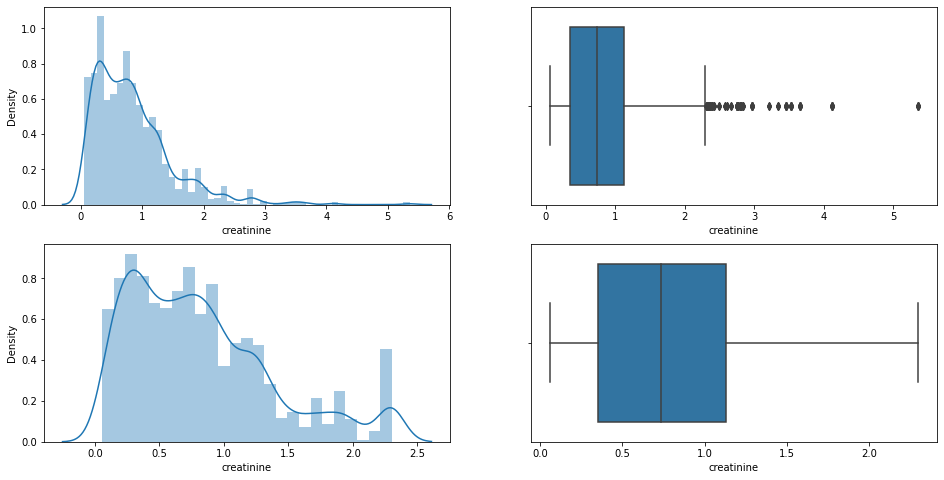

In [11]:
#creatinine
#Finding the IQR value
percentile25=df['creatinine'].quantile(0.25)
percentile75=df['creatinine'].quantile(0.75)
print("percentile75 of  creatinine=",percentile75)
print("prcentile25 of creatinine=",percentile25)
iqr=percentile75 -percentile25
print("iqr",iqr)

upper_limit=percentile75+1.5*iqr
lower_limit=percentile25-1.5*iqr

print("Upper_limit",upper_limit)
print("Lower_limit",lower_limit)#creatinine
#Finding the IQR value
percentile25=df['creatinine'].quantile(0.25)
percentile75=df['creatinine'].quantile(0.75)
print("percentile75 of  creatinine=",percentile75)
print("prcentile25 of creatinine=",percentile25)
iqr=percentile75 -percentile25
print("iqr",iqr)

upper_limit=percentile75+1.5*iqr
lower_limit=percentile25-1.5*iqr

print("Upper_limit",upper_limit)
print("Lower_limit",lower_limit)

#finding outliers
print(df[df['creatinine']>upper_limit])

#Capping
new_df_cap=df.copy()
new_df_cap['creatinine']=np.where(
    new_df_cap['creatinine']>upper_limit,
    upper_limit,
    np.where(
        new_df_cap['creatinine']<lower_limit,
        lower_limit,
        new_df_cap['creatinine']
        )
    )

new_df_cap.shape
#Comparing
plt.figure(figsize=(16,8))
plt.subplot(2,2,1)
sns.distplot(df['creatinine'])
plt.subplot(2,2,2)
sns.boxplot(df['creatinine'])
plt.subplot(2,2,3)
sns.distplot(new_df_cap['creatinine'])
plt.subplot(2,2,4)
sns.boxplot(new_df_cap['creatinine'])
plt.show()

In [15]:
print(df['LYVE1'].describe())

count    4950.000000
mean        2.300999
std         3.111772
min         0.000129
25%         0.004976
50%         0.901411
75%         3.900891
max        23.890323
Name: LYVE1, dtype: float64


percentile75 of  LYVE1= 3.900891
prcentile25 of LYVE1= 0.0049764
iqr 3.8959146000000002
Upper_limit 9.7447629
Lower_limit -5.8388955
     Sample_Id patient_cohort sample_origin  age  sex  diagnosis stage  \
321       S228        Cohort1           ESP   55    1          2   NaN   
391       S497        Cohort1           ESP   81    2          2     I   
395       S401        Cohort1           LIV   73    1          2    IB   
408       S498        Cohort1           ESP   53    1          2    II   
410       S504        Cohort1           ESP   54    1          2    II   
...        ...            ...           ...  ...  ...        ...   ...   
4436       NaN            NaN           NaN   40    1          2   NaN   
4475       NaN            NaN           NaN   45    2          2   NaN   
4483       NaN            NaN           NaN   62    2          2   NaN   
4488       NaN            NaN           NaN   65    1          2   NaN   
4496       NaN            NaN           NaN   58    2

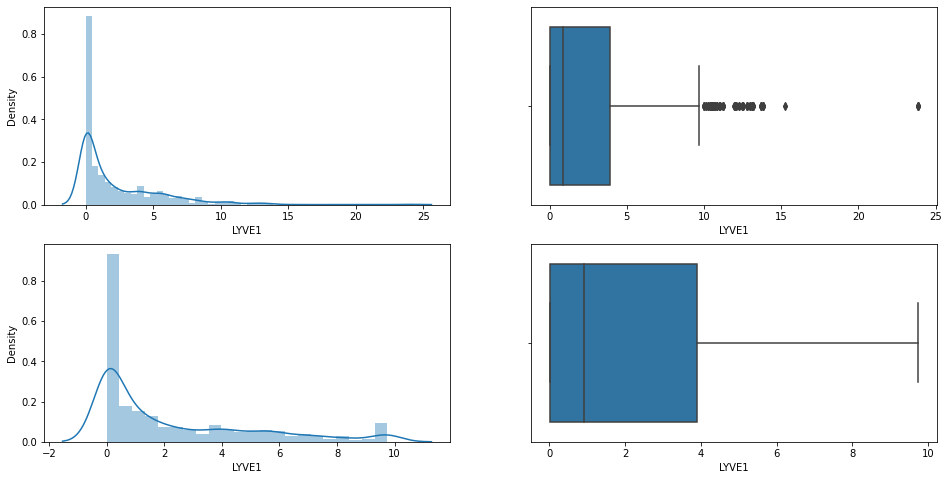

In [14]:
#LYVE1
#Finding the IQR value
percentile25=df['LYVE1'].quantile(0.25)
percentile75=df['LYVE1'].quantile(0.75)
print("percentile75 of  LYVE1=",percentile75)
print("prcentile25 of LYVE1=",percentile25)
iqr=percentile75 -percentile25
print("iqr",iqr)

upper_limit=percentile75+1.5*iqr
lower_limit=percentile25-1.5*iqr

print("Upper_limit",upper_limit)
print("Lower_limit",lower_limit)


#finding outliers
print(df[df['LYVE1']>upper_limit])

#Capping
new_df_cap=df.copy()
new_df_cap['LYVE1']=np.where(
    new_df_cap['LYVE1']>upper_limit,
    upper_limit,
    np.where(
        new_df_cap['LYVE1']<lower_limit,
        lower_limit,
        new_df_cap['LYVE1']
        )
    )

new_df_cap.shape
#Comparing
plt.figure(figsize=(16,8))
plt.subplot(2,2,1)
sns.distplot(df['LYVE1'])
plt.subplot(2,2,2)
sns.boxplot(df['LYVE1'])
plt.subplot(2,2,3)
sns.distplot(new_df_cap['LYVE1'])
plt.subplot(2,2,4)
sns.boxplot(new_df_cap['LYVE1'])
plt.show()

In [12]:
print(df['REG1B'].describe())

count    4931.000000
mean       65.335583
std       126.782584
min         0.001104
25%         7.232498
50%        21.571088
75%        67.468000
max      1293.819450
Name: REG1B, dtype: float64


percentile75 of  REG1B= 67.468
prcentile25 of REG1B= 7.232498
iqr 60.235502000000004
Upper_limit 157.821253
Lower_limit -83.120755
     Sample_Id patient_cohort sample_origin  age  sex  diagnosis stage  \
11        S109        Cohort2          BPTB   71    1          1   NaN   
52        S146        Cohort2          BPTB   63    2          1   NaN   
78         S17        Cohort1          BPTB   49    1          1   NaN   
133        S54        Cohort1          BPTB   62    1          1   NaN   
151        S70        Cohort1          BPTB   57    1          1   NaN   
...        ...            ...           ...  ...  ...        ...   ...   
4833       NaN            NaN           NaN   78    2          1   NaN   
4876       NaN            NaN           NaN   73    1          1   NaN   
4917       NaN            NaN           NaN   64    2          1   NaN   
4943       NaN            NaN           NaN   40    2          1   NaN   
4998       NaN            NaN           NaN   48    1  

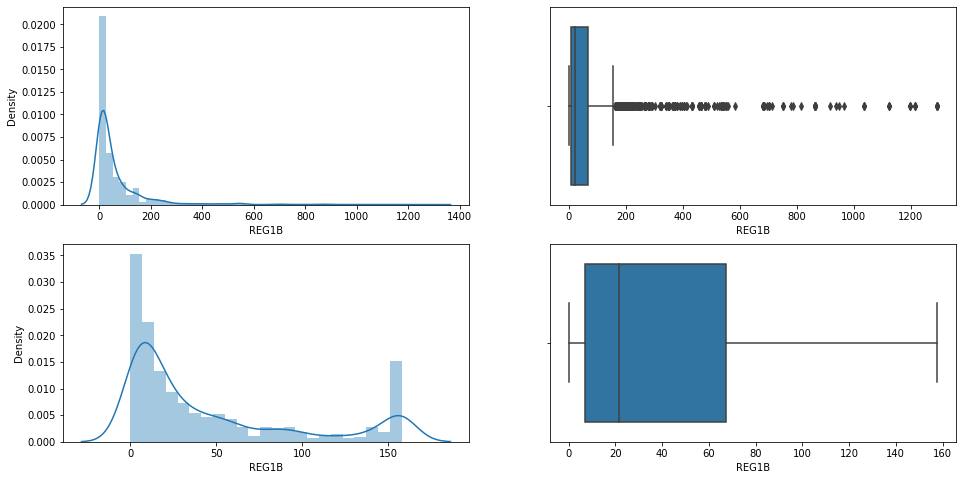

In [13]:
#REG1B
#Finding the IQR value
percentile25=df['REG1B'].quantile(0.25)
percentile75=df['REG1B'].quantile(0.75)
print("percentile75 of  REG1B=",percentile75)
print("prcentile25 of REG1B=",percentile25)
iqr=percentile75 -percentile25
print("iqr",iqr)

upper_limit=percentile75+1.5*iqr
lower_limit=percentile25-1.5*iqr

print("Upper_limit",upper_limit)
print("Lower_limit",lower_limit)

#finding outliers
print(df[df['REG1B']>upper_limit])

#Capping
new_df_cap=df.copy()
new_df_cap['REG1B']=np.where(
    new_df_cap['REG1B']>upper_limit,
    upper_limit,
    np.where(
        new_df_cap['REG1B']<lower_limit,
        lower_limit,
        new_df_cap['REG1B']
        )
    )

new_df_cap.shape
#Comparing
plt.figure(figsize=(16,8))
plt.subplot(2,2,1)
sns.distplot(df['REG1B'])
plt.subplot(2,2,2)
sns.boxplot(df['REG1B'])
plt.subplot(2,2,3)
sns.distplot(new_df_cap['REG1B'])
plt.subplot(2,2,4)
sns.boxplot(new_df_cap['REG1B'])
plt.show()

In [16]:
print(df['TFF1'].describe())

count     4922.000000
mean       320.803147
std        782.380984
min          0.005293
25%          7.113679
50%         97.258522
75%        324.669300
max      13344.300000
Name: TFF1, dtype: float64


percentile75 of  TFF1= 324.6693
prcentile25 of TFF1= 7.113679
iqr 317.55562100000003
Upper_limit 801.0027315000001
Lower_limit -469.2197525000001
     Sample_Id patient_cohort sample_origin  age  sex  diagnosis stage  \
31        S127        Cohort2          BPTB   44    2          1   NaN   
35        S130        Cohort2          BPTB   44    2          1   NaN   
42        S137        Cohort2          BPTB   48    2          1   NaN   
43        S138        Cohort2          BPTB   89    2          1   NaN   
100        S24        Cohort1          BPTB   56    2          1   NaN   
...        ...            ...           ...  ...  ...        ...   ...   
4854       NaN            NaN           NaN   60    2          1   NaN   
4875       NaN            NaN           NaN   60    1          1   NaN   
4930       NaN            NaN           NaN   53    2          1   NaN   
4971       NaN            NaN           NaN   40    2          1   NaN   
4992       NaN            NaN           

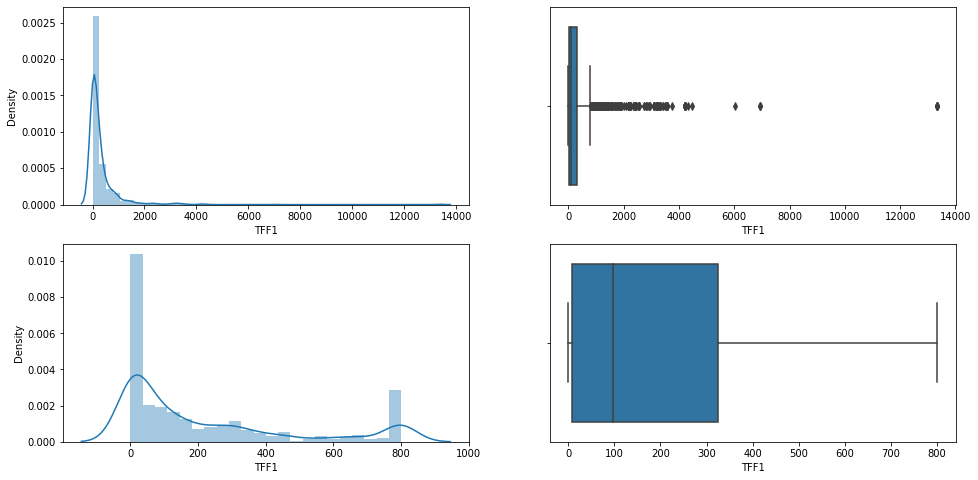

In [17]:
#TFF1
#Finding the IQR value
percentile25=df['TFF1'].quantile(0.25)
percentile75=df['TFF1'].quantile(0.75)
print("percentile75 of  TFF1=",percentile75)
print("prcentile25 of TFF1=",percentile25)
iqr=percentile75 -percentile25
print("iqr",iqr)

upper_limit=percentile75+1.5*iqr
lower_limit=percentile25-1.5*iqr

print("Upper_limit",upper_limit)
print("Lower_limit",lower_limit)

#finding outliers
print(df[df['TFF1']>upper_limit])

#Capping
new_df_cap=df.copy()
new_df_cap['TFF1']=np.where(
    new_df_cap['TFF1']>upper_limit,
    upper_limit,
    np.where(
        new_df_cap['TFF1']<lower_limit,
        lower_limit,
        new_df_cap['TFF1']
        )
    )

new_df_cap.shape
#Comparing
plt.figure(figsize=(16,8))
plt.subplot(2,2,1)
sns.distplot(df['TFF1'])
plt.subplot(2,2,2)
sns.boxplot(df['TFF1'])
plt.subplot(2,2,3)
sns.distplot(new_df_cap['TFF1'])
plt.subplot(2,2,4)
sns.boxplot(new_df_cap['TFF1'])
plt.show()

In [18]:
print(df['REG1A'].describe())

count    4868.000000
mean      606.466401
std      1048.823889
min         7.320000
25%       156.000000
50%       324.000000
75%       533.000000
max      9823.000000
Name: REG1A, dtype: float64


percentile75 of REG1A= 533.0
prcentile25 of REG1A= 156.0
iqr 377.0
Upper_limit 1098.5
Lower_limit -409.5
     Sample_Id patient_cohort sample_origin  age  sex  diagnosis stage  \
3         S101        Cohort2          BPTB   61    1          1   NaN   
151        S70        Cohort1          BPTB   57    1          1   NaN   
189       S338        Cohort1          BPTB   52    1          2   NaN   
193       S263        Cohort2          BPTB   71    1          2   NaN   
194       S274        Cohort2          BPTB   52    2          2   NaN   
...        ...            ...           ...  ...  ...        ...   ...   
4956       NaN            NaN           NaN   26    2          1   NaN   
4960       NaN            NaN           NaN   67    2          1   NaN   
4974       NaN            NaN           NaN   58    1          1   NaN   
4978       NaN            NaN           NaN   84    1          1   NaN   
4996       NaN            NaN           NaN   46    1          1   NaN   

      

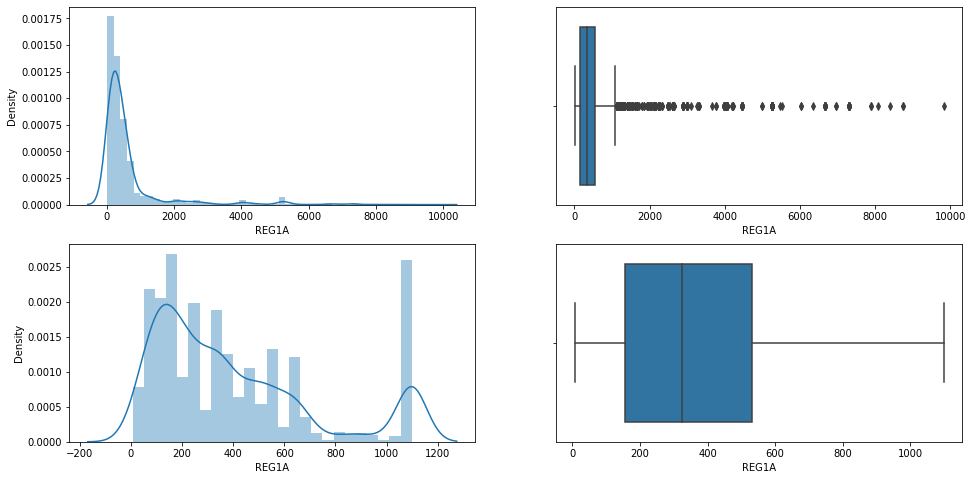

In [19]:
#REG1A
#Finding the IQR value
percentile25=df['REG1A'].quantile(0.25)
percentile75=df['REG1A'].quantile(0.75)
print("percentile75 of REG1A=",percentile75)
print("prcentile25 of REG1A=",percentile25)
iqr=percentile75 -percentile25
print("iqr",iqr)

upper_limit=percentile75+1.5*iqr
lower_limit=percentile25-1.5*iqr

print("Upper_limit",upper_limit)
print("Lower_limit",lower_limit)

#finding outliers
print(df[df['REG1A']>upper_limit])

#Capping
new_df_cap=df.copy()
new_df_cap['REG1A']=np.where(
    new_df_cap['REG1A']>upper_limit,
    upper_limit,
    np.where(
        new_df_cap['REG1A']<lower_limit,
        lower_limit,
        new_df_cap['REG1A']
        )
    )

new_df_cap.shape
#Comparing
plt.figure(figsize=(16,8))
plt.subplot(2,2,1)
sns.distplot(df['REG1A'])
plt.subplot(2,2,2)
sns.boxplot(df['REG1A'])
plt.subplot(2,2,3)
sns.distplot(new_df_cap['REG1A'])
plt.subplot(2,2,4)
sns.boxplot(new_df_cap['REG1A'])
plt.show()

In [20]:
print(df['CEA'].describe())

count      4894.000000
mean       1855.778957
std       28123.610249
min           0.001000
25%           2.013500
50%           4.040000
75%           7.650000
max      430214.025000
Name: CEA, dtype: float64


percentile75 of  CEA= 7.65
prcentile25 of CEA= 2.0135
iqr 5.6365
Upper_limit 16.104750000000003
Lower_limit -6.44125
     Sample_Id patient_cohort sample_origin  age  sex  diagnosis stage  \
168        S86        Cohort2          BPTB   72    2          1   NaN   
428       S403        Cohort1           LIV   66    1          2   IIB   
496       S397        Cohort1           LIV   65    2          2   III   
829        NaN            NaN           NaN   26    1          1   NaN   
983        NaN            NaN           NaN   77    1          1   NaN   
1042       NaN            NaN           NaN   57    2          1   NaN   
1335       NaN            NaN           NaN   56    1          1   NaN   
1403       NaN            NaN           NaN   44    2          2   NaN   
1552       NaN            NaN           NaN   50    1          1   NaN   
1553       NaN            NaN           NaN   49    2          1   NaN   
1554       NaN            NaN           NaN   63    1          1   Na

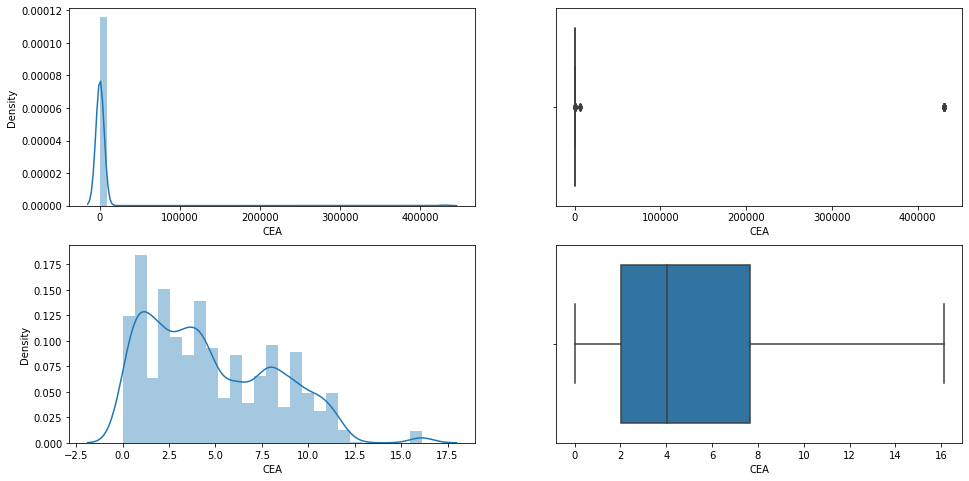

In [21]:
#CEA
#Finding the IQR value
percentile25=df['CEA'].quantile(0.25)
percentile75=df['CEA'].quantile(0.75)
print("percentile75 of  CEA=",percentile75)
print("prcentile25 of CEA=",percentile25)
iqr=percentile75 -percentile25
print("iqr",iqr)

upper_limit=percentile75+1.5*iqr
lower_limit=percentile25-1.5*iqr

print("Upper_limit",upper_limit)
print("Lower_limit",lower_limit)

#finding outliers
print(df[df['CEA']>upper_limit])

#Capping
new_df_cap=df.copy()
new_df_cap['CEA']=np.where(
    new_df_cap['CEA']>upper_limit,
    upper_limit,
    np.where(
        new_df_cap['CEA']<lower_limit,
        lower_limit,
        new_df_cap['CEA']
        )
    )

new_df_cap.shape
#Comparing
plt.figure(figsize=(16,8))
plt.subplot(2,2,1)
sns.distplot(df['CEA'])
plt.subplot(2,2,2)
sns.boxplot(df['CEA'])
plt.subplot(2,2,3)
sns.distplot(new_df_cap['CEA'])
plt.subplot(2,2,4)
sns.boxplot(new_df_cap['CEA'])
plt.show()

In [22]:
print(df['CA125'].describe())

count     4879.000000
mean       390.238756
std       1333.296048
min          0.056476
25%         12.000000
50%         34.874470
75%        195.000000
max      18360.000000
Name: CA125, dtype: float64


percentile75 of  CA125= 195.0
prcentile25 of CA125= 12.0
iqr 183.0
Upper_limit 469.5
Lower_limit -262.5
     Sample_Id patient_cohort sample_origin  age  sex  diagnosis stage  \
238       S353        Cohort2          BPTB   48    1          2   NaN   
250       S331        Cohort2          BPTB   79    1          2   NaN   
303       S262        Cohort2          BPTB   69    1          2   NaN   
304       S264        Cohort1          BPTB   57    1          2   NaN   
306       S281        Cohort1          BPTB   62    1          2   NaN   
...        ...            ...           ...  ...  ...        ...   ...   
4488       NaN            NaN           NaN   65    1          2   NaN   
4490       NaN            NaN           NaN   78    2          2   NaN   
4491       NaN            NaN           NaN   61    2          2   NaN   
4497       NaN            NaN           NaN   66    2          2   NaN   
4498       NaN            NaN           NaN   55    1          2   NaN   

       

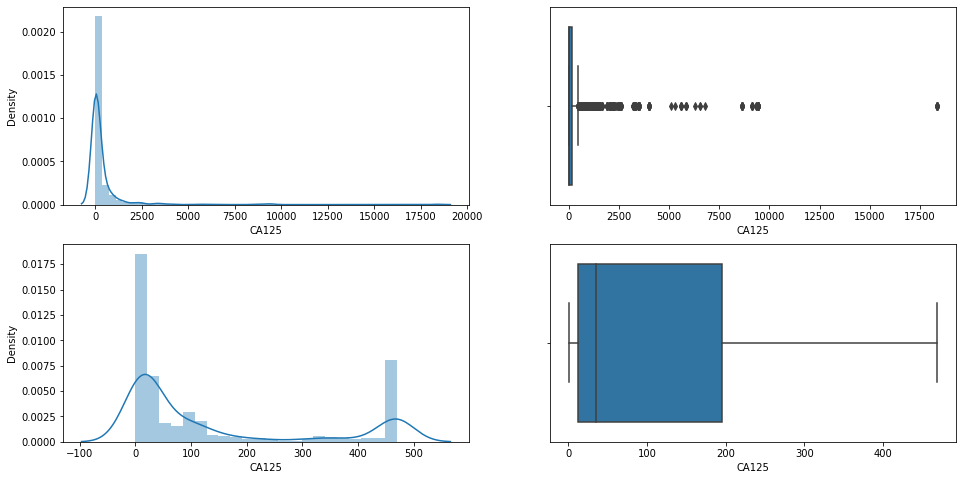

In [26]:
#CA125
#Finding the IQR value
percentile25=df['CA125'].quantile(0.25)
percentile75=df['CA125'].quantile(0.75)
print("percentile75 of  CA125=",percentile75)
print("prcentile25 of CA125=",percentile25)
iqr=percentile75 -percentile25
print("iqr",iqr)

upper_limit=percentile75+1.5*iqr
lower_limit=percentile25-1.5*iqr

print("Upper_limit",upper_limit)
print("Lower_limit",lower_limit)

#finding outliers
print(df[df['CA125']>upper_limit])

#Capping
new_df_cap=df.copy()
new_df_cap['CA125']=np.where(
    new_df_cap['CA125']>upper_limit,
    upper_limit,
    np.where(
        new_df_cap['CA125']<lower_limit,
        lower_limit,
        new_df_cap['CA125']
        )
    )
new_df_cap.shape
#Comparing
plt.figure(figsize=(16,8))
plt.subplot(2,2,1)
sns.distplot(df['CA125'])
plt.subplot(2,2,2)
sns.boxplot(df['CA125'])
plt.subplot(2,2,3)
sns.distplot(new_df_cap['CA125'])
plt.subplot(2,2,4)
sns.boxplot(new_df_cap['CA125'])
plt.show()

In [24]:
print(df['HbA1c'].describe())

count    4814.000000
mean       90.837349
std        83.176853
min        11.000000
25%        47.000000
50%        53.000000
75%        91.000000
max      2215.000000
Name: HbA1c, dtype: float64


percentile75 of  HbA1c= 91.0
prcentile25 of HbA1c= 47.0
iqr 44.0
Upper_limit 157.0
Lower_limit -19.0
     Sample_Id patient_cohort sample_origin  age  sex  diagnosis stage  \
365       S324        Cohort2          BPTB   41    1          2   NaN   
375       S359        Cohort2          BPTB   44    2          2   NaN   
379       S276        Cohort2          BPTB   59    2          2   NaN   
385       S335        Cohort2          BPTB   75    2          2   NaN   
386       S360        Cohort2          BPTB   49    1          2   NaN   
...        ...            ...           ...  ...  ...        ...   ...   
4493       NaN            NaN           NaN   68    1          2   NaN   
4494       NaN            NaN           NaN   54    2          2   NaN   
4495       NaN            NaN           NaN   54    2          2   NaN   
4496       NaN            NaN           NaN   58    2          2   NaN   
4497       NaN            NaN           NaN   66    2          2   NaN   

          

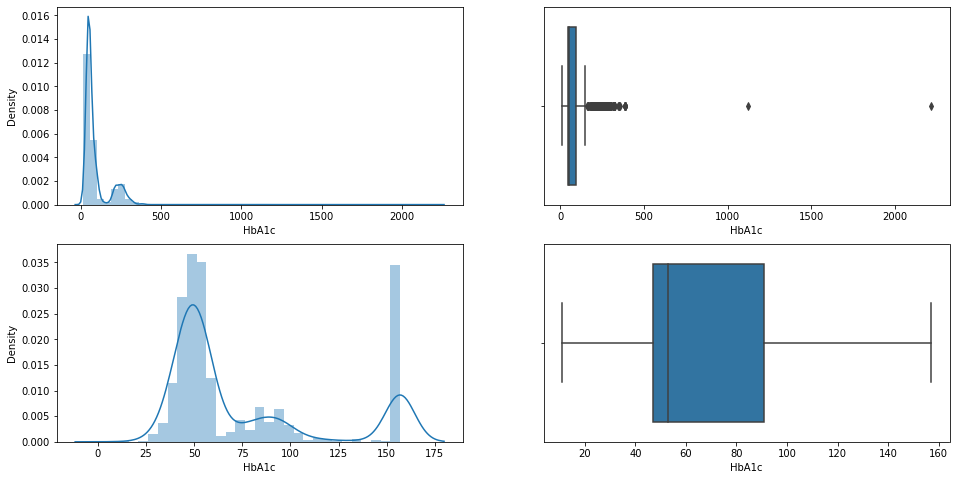

In [25]:
#HbA1c
#Finding the IQR value
percentile25=df['HbA1c'].quantile(0.25)
percentile75=df['HbA1c'].quantile(0.75)
print("percentile75 of  HbA1c=",percentile75)
print("prcentile25 of HbA1c=",percentile25)
iqr=percentile75 -percentile25
print("iqr",iqr)

upper_limit=percentile75+1.5*iqr
lower_limit=percentile25-1.5*iqr

print("Upper_limit",upper_limit)
print("Lower_limit",lower_limit)

#finding outliers
print(df[df['HbA1c']>upper_limit])

#Capping
new_df_cap=df.copy()
new_df_cap['HbA1c']=np.where(
    new_df_cap['HbA1c']>upper_limit,
    upper_limit,
    np.where(
        new_df_cap['HbA1c']<lower_limit,
        lower_limit,
        new_df_cap['HbA1c']
        )
    )
new_df_cap.shape
#Comparing
plt.figure(figsize=(16,8))
plt.subplot(2,2,1)
sns.distplot(df['HbA1c'])
plt.subplot(2,2,2)
sns.boxplot(df['HbA1c'])
plt.subplot(2,2,3)
sns.distplot(new_df_cap['HbA1c'])
plt.subplot(2,2,4)
sns.boxplot(new_df_cap['HbA1c'])
plt.show()

In [27]:
X_train['plasma_CA19_9_imputed']= X_train['plasma_CA19_9']
X_test['plasma_CA19_9_imputed']= X_test['plasma_CA19_9']
X_train['creatinine_imputed']= X_train['creatinine']
X_test['creatinine_imputed']= X_test['creatinine']
X_train['LYVE1_imputed']= X_train['LYVE1']
X_test['LYVE1_imputed']= X_test['LYVE1']
X_train['REG1B_imputed']= X_train['REG1B']
X_test['REG1B_imputed']= X_test['REG1B']
X_train['TFF1_imputed']= X_train['TFF1']
X_test['TFF1_imputed']= X_test['TFF1']
X_train['REG1A_imputed']= X_train['REG1A']
X_test['REG1A_imputed']= X_test['REG1A']
X_train['CEA_imputed']= X_train['CEA']
X_test['CEA_imputed']= X_test['CEA']
X_train['CA125_imputed']= X_train['CA125']
X_test['CA125_imputed']= X_test['CA125']
X_train['HbA1c_imputed']= X_train['HbA1c']
X_test['HbA1c_imputed']= X_test['HbA1c']

In [28]:
X_train['plasma_CA19_9_imputed'][X_train['plasma_CA19_9_imputed'].isnull()]=X_train['plasma_CA19_9'].dropna().sample(X_train['plasma_CA19_9'].isnull().sum()).values
X_test['plasma_CA19_9_imputed'][X_test['plasma_CA19_9_imputed'].isnull()]=X_train['plasma_CA19_9'].dropna().sample(X_test['plasma_CA19_9'].isnull().sum()).values
X_train['creatinine_imputed'][X_train['creatinine_imputed'].isnull()]=X_train['creatinine'].dropna().sample(X_train['creatinine'].isnull().sum()).values
X_test['creatinine_imputed'][X_test['creatinine_imputed'].isnull()]=X_train['creatinine'].dropna().sample(X_test['creatinine'].isnull().sum()).values
X_train['LYVE1_imputed'][X_train['LYVE1_imputed'].isnull()]=X_train['LYVE1'].dropna().sample(X_train['LYVE1'].isnull().sum()).values
X_test['LYVE1_imputed'][X_test['LYVE1_imputed'].isnull()]=X_train['LYVE1'].dropna().sample(X_test['LYVE1'].isnull().sum()).values
X_train['REG1B_imputed'][X_train['REG1B_imputed'].isnull()]=X_train['REG1B'].dropna().sample(X_train['REG1B'].isnull().sum()).values
X_test['REG1B_imputed'][X_test['REG1B_imputed'].isnull()]=X_train['REG1B'].dropna().sample(X_test['REG1B'].isnull().sum()).values
X_train['TFF1_imputed'][X_train['TFF1_imputed'].isnull()]=X_train['TFF1'].dropna().sample(X_train['TFF1'].isnull().sum()).values
X_test['TFF1_imputed'][X_test['TFF1_imputed'].isnull()]=X_train['TFF1'].dropna().sample(X_test['TFF1'].isnull().sum()).values
X_train['REG1A_imputed'][X_train['REG1A_imputed'].isnull()]=X_train['REG1A'].dropna().sample(X_train['REG1A'].isnull().sum()).values
X_test['REG1A_imputed'][X_test['REG1A_imputed'].isnull()]=X_train['REG1A'].dropna().sample(X_test['REG1A'].isnull().sum()).values
X_train['CEA_imputed'][X_train['CEA_imputed'].isnull()]=X_train['CEA'].dropna().sample(X_train['CEA'].isnull().sum()).values
X_test['CEA_imputed'][X_test['CEA_imputed'].isnull()]=X_train['CEA'].dropna().sample(X_test['CEA'].isnull().sum()).values
X_train['CA125_imputed'][X_train['CA125_imputed'].isnull()]=X_train['CA125'].dropna().sample(X_train['CA125'].isnull().sum()).values
X_test['CA125_imputed'][X_test['CA125_imputed'].isnull()]=X_train['CA125'].dropna().sample(X_test['CA125'].isnull().sum()).values
X_train['HbA1c_imputed'][X_train['HbA1c_imputed'].isnull()]=X_train['HbA1c'].dropna().sample(X_train['HbA1c'].isnull().sum()).values
X_test['HbA1c_imputed'][X_test['HbA1c_imputed'].isnull()]=X_train['HbA1c'].dropna().sample(X_test['HbA1c'].isnull().sum()).values

In [29]:
print(X_train.head(60))

      age  sex  plasma_CA19_9  creatinine      LYVE1       REG1B         TFF1  \
1714   63    1      13.965000    0.158340   2.440180   22.471281   292.467351   
3941   67    1     502.000000    0.870870   5.353564   70.605010   663.593631   
2645   59    2      13.580000    0.339300   0.002895    5.354000   126.134750   
3162   44    2      19.964500    0.723840   0.145589   29.522000   126.635571   
656    28    2       8.562000    0.950040   0.000679    0.954900   299.118360   
3424   65    1       5.232000    1.911390   0.008405    6.122000    16.640000   
1722   51    1      12.413000    0.067860   4.239308    1.907000   123.088455   
3643   63    2      56.000000    0.622050   0.000543   60.579000     0.025583   
2351   41    2      22.560000    0.248820   0.571181    3.099211   279.696800   
3210   81    1       2.235000    0.803010   1.642057  115.367000   267.694524   
3043   68    2      24.643200    0.769080   0.019426    9.572190   292.467351   
849    38    2       5.23200

In [30]:
X_train_trf=X_train.drop(columns=['plasma_CA19_9','creatinine','LYVE1','REG1B','TFF1','REG1A','CEA','CA125','HbA1c'])
X_test_trf=X_test.drop(columns=['plasma_CA19_9','creatinine','LYVE1','REG1B','TFF1','REG1A','CEA','CA125','HbA1c'])

In [31]:
print(X_train_trf.head(60))

      age  sex  plasma_CA19_9_imputed  creatinine_imputed  LYVE1_imputed  \
1714   63    1              13.965000            0.158340       2.440180   
3941   67    1             502.000000            0.870870       5.353564   
2645   59    2              13.580000            0.339300       0.002895   
3162   44    2              19.964500            0.723840       0.145589   
656    28    2               8.562000            0.950040       0.000679   
3424   65    1               5.232000            1.911390       0.008405   
1722   51    1              12.413000            0.067860       4.239308   
3643   63    2              56.000000            0.622050       0.000543   
2351   41    2              22.560000            0.248820       0.571181   
3210   81    1               2.235000            0.803010       1.642057   
3043   68    2              24.643200            0.769080       0.019426   
849    38    2               5.232000            0.588120       0.000906   
4096   81   

In [32]:
from sklearn.metrics import accuracy_score

In [33]:
#Logistic Regression
from sklearn.linear_model import LogisticRegression

lr = LogisticRegression()

lr.fit(X_train_trf,Y_train)

Y_pred_lr = lr.predict(X_test_trf)
score_lr = round(accuracy_score(Y_pred_lr,Y_test)*100,2)
print("The accuracy score achieved using Logistic Regression is: "+str(score_lr)+" %")
from sklearn.metrics import confusion_matrix,accuracy_score
cm=confusion_matrix(Y_test,Y_pred_lr)
print("Confusion Matrix:",cm)
accuracy=(accuracy_score(Y_test,Y_pred_lr))
print("The accuracy score achieved using Logistic Regression is",accuracy)
sensitivity=cm[0,0]/(cm[0,0]+cm[0,1])
print("The Sensitivity score achieved using Logistic Regression is",sensitivity)
specificity=cm[1,1]/(cm[1,0]+cm[1,1])
print("The Specificity score achieved using Logistic Regression is",specificity)
print(metrics.classification_report(Y_test,Y_pred_lr))

The accuracy score achieved using Logistic Regression is: 94.0 %
Confusion Matrix: [[620  31]
 [ 29 320]]
The accuracy score achieved using Logistic Regression is 0.94
The Sensitivity score achieved using Logistic Regression is 0.9523809523809523
The Specificity score achieved using Logistic Regression is 0.9169054441260746
              precision    recall  f1-score   support

           1       0.96      0.95      0.95       651
           2       0.91      0.92      0.91       349

    accuracy                           0.94      1000
   macro avg       0.93      0.93      0.93      1000
weighted avg       0.94      0.94      0.94      1000



In [34]:
#Adding KNeighbors Classifier
from sklearn.neighbors import KNeighborsClassifier
knn=KNeighborsClassifier(n_neighbors=4)
knn.fit(X_train_trf,Y_train)
y_pred=knn.predict(X_test_trf)
score_knn = round(accuracy_score(y_pred,Y_test)*100,2)
print("The accuracy score achieved using KNeighbors is: "+str(score_knn)+" %")
from sklearn.metrics import confusion_matrix,accuracy_score
cm=confusion_matrix(Y_test,y_pred)
print("Confusion Matrix:",cm)
accuracy=(accuracy_score(Y_test,y_pred))
print("The accuracy score achieved using KNeighbors Classifier is",accuracy)
sensitivity=cm[0,0]/(cm[0,0]+cm[0,1])
print("The Sensitivity score achieved using KNeighbors Classifier is",sensitivity)
specificity=cm[1,1]/(cm[1,0]+cm[1,1])
print("The Specificity score achieved using KNeighbors Classifier is",specificity)
print(metrics.classification_report(Y_test,y_pred))

The accuracy score achieved using KNeighbors is: 94.3 %
Confusion Matrix: [[640  11]
 [ 46 303]]
The accuracy score achieved using KNeighbors Classifier is 0.943
The Sensitivity score achieved using KNeighbors Classifier is 0.9831029185867896
The Specificity score achieved using KNeighbors Classifier is 0.8681948424068768
              precision    recall  f1-score   support

           1       0.93      0.98      0.96       651
           2       0.96      0.87      0.91       349

    accuracy                           0.94      1000
   macro avg       0.95      0.93      0.94      1000
weighted avg       0.94      0.94      0.94      1000



In [35]:
#Decision Tree
from sklearn.tree import DecisionTreeClassifier

max_accuracy = 0


for x in range(500):
    dt = DecisionTreeClassifier(random_state=x)
    dt.fit(X_train_trf,Y_train)
    Y_pred_dt = dt.predict(X_test_trf)
    current_accuracy = round(accuracy_score(Y_pred_dt,Y_test)*100,2)
    if(current_accuracy>max_accuracy):
        max_accuracy = current_accuracy
        best_x = x
        
print(max_accuracy)
print(best_x)


dt = DecisionTreeClassifier(random_state=best_x)
dt.fit(X_train_trf,Y_train)
Y_pred_dt = dt.predict(X_test_trf)
print(Y_pred_dt.shape)
from sklearn.metrics import confusion_matrix,accuracy_score
cm=confusion_matrix(Y_test,Y_pred_dt)
print("Confusion Matrix:",cm)
accuracy=(accuracy_score(Y_test,Y_pred_dt))
print("The accuracy score achieved using DecisionTreeClassifier is",accuracy)
sensitivity=cm[0,0]/(cm[0,0]+cm[0,1])
print("The Sensitivity score achieved using DecisionTreeClassifier is",sensitivity)
specificity=cm[1,1]/(cm[1,0]+cm[1,1])
print("The Specificity score achieved using DecisionTreeClassifier is",specificity)
print(metrics.classification_report(Y_test,Y_pred_dt))
score_dt = round(accuracy_score(Y_pred_dt,Y_test)*100,2)

99.1
4
(1000,)
Confusion Matrix: [[647   4]
 [  5 344]]
The accuracy score achieved using DecisionTreeClassifier is 0.991
The Sensitivity score achieved using DecisionTreeClassifier is 0.9938556067588326
The Specificity score achieved using DecisionTreeClassifier is 0.9856733524355301
              precision    recall  f1-score   support

           1       0.99      0.99      0.99       651
           2       0.99      0.99      0.99       349

    accuracy                           0.99      1000
   macro avg       0.99      0.99      0.99      1000
weighted avg       0.99      0.99      0.99      1000



In [36]:
#Random Forest
from sklearn.ensemble import RandomForestClassifier

max_accuracy = 0


for x in range(500):
    rf = RandomForestClassifier(random_state=x)
    rf.fit(X_train_trf,Y_train)
    Y_pred_rf = rf.predict(X_test_trf)
    current_accuracy = round(accuracy_score(Y_pred_rf,Y_test)*100,2)
    if(current_accuracy>max_accuracy):
        max_accuracy = current_accuracy
        best_x = x
        
print(max_accuracy)
print(best_x)

rf = RandomForestClassifier(random_state=best_x)
rf.fit(X_train_trf,Y_train)
Y_pred_rf = rf.predict(X_test_trf)
Y_pred_rf.shape
from sklearn.metrics import confusion_matrix,accuracy_score
cm=confusion_matrix(Y_test,Y_pred_rf)
print("Confusion Matrix:",cm)
accuracy=(accuracy_score(Y_test,Y_pred_rf))
print("The accuracy score achieved using RandomForestClassifier is",accuracy)
sensitivity=cm[0,0]/(cm[0,0]+cm[0,1])
print("The Sensitivity score achieved using RandomForestClassifier is",sensitivity)
specificity=cm[1,1]/(cm[1,0]+cm[1,1])
print("The Specificity score achieved using RandomForestClassifier is",specificity)
print(metrics.classification_report(Y_test,Y_pred_rf))
score_rf = round(accuracy_score(Y_pred_rf,Y_test)*100,2)

99.7
78
Confusion Matrix: [[650   1]
 [  2 347]]
The accuracy score achieved using RandomForestClassifier is 0.997
The Sensitivity score achieved using RandomForestClassifier is 0.9984639016897081
The Specificity score achieved using RandomForestClassifier is 0.994269340974212
              precision    recall  f1-score   support

           1       1.00      1.00      1.00       651
           2       1.00      0.99      1.00       349

    accuracy                           1.00      1000
   macro avg       1.00      1.00      1.00      1000
weighted avg       1.00      1.00      1.00      1000



In [37]:
#Adding NaiveBayes Classifier

from sklearn.naive_bayes import GaussianNB
nb=GaussianNB()
nb.fit(X_train_trf,Y_train)
Y_pred=nb.predict(X_test_trf)
score_nb = round(accuracy_score(Y_pred,Y_test)*100,2)
#print("The accuracy score achieved using Naive bayes is: "+str(score_nb)+" %")
from sklearn.metrics import confusion_matrix,accuracy_score
cm=confusion_matrix(Y_test,Y_pred)
print("Confusion Matrix:",cm)
accuracy=(accuracy_score(Y_test,Y_pred))
print("The accuracy score achieved using NaiveBayes Classifier is",accuracy)
sensitivity=cm[0,0]/(cm[0,0]+cm[0,1])
print("The Sensitivity score achieved using NaiveBayes Classifier is",sensitivity)
specificity=cm[1,1]/(cm[1,0]+cm[1,1])
print("The Specificity score achieved using NaiveBayes Classifier is",specificity)
print(metrics.classification_report(Y_test,Y_pred))

Confusion Matrix: [[628  23]
 [ 18 331]]
The accuracy score achieved using NaiveBayes Classifier is 0.959
The Sensitivity score achieved using NaiveBayes Classifier is 0.9646697388632872
The Specificity score achieved using NaiveBayes Classifier is 0.9484240687679083
              precision    recall  f1-score   support

           1       0.97      0.96      0.97       651
           2       0.94      0.95      0.94       349

    accuracy                           0.96      1000
   macro avg       0.95      0.96      0.96      1000
weighted avg       0.96      0.96      0.96      1000



In [38]:
#Adding SVM (support vector machine)Classifier

from sklearn.svm import SVC
svm=SVC()
svm.fit(X_train_trf,Y_train)
Y_pred=svm.predict(X_test_trf)
score_svm = round(accuracy_score(Y_pred,Y_test)*100,2)
#print("The accuracy score achieved using SVM is: "+str(score_svm)+" %")
from sklearn.metrics import confusion_matrix,accuracy_score
cm=confusion_matrix(Y_test,Y_pred)
print("Confusion Matrix:",cm)
accuracy=(accuracy_score(Y_test,Y_pred))
print("The accuracy score achieved using SVM is",accuracy)
sensitivity=cm[0,0]/(cm[0,0]+cm[0,1])
print("The Sensitivity score achieved using SVM is",sensitivity)
specificity=cm[1,1]/(cm[1,0]+cm[1,1])
print("The Specificity score achieved using SVM is",specificity)
print(metrics.classification_report(Y_test,Y_pred))

Confusion Matrix: [[639  12]
 [163 186]]
The accuracy score achieved using SVM is 0.825
The Sensitivity score achieved using SVM is 0.9815668202764977
The Specificity score achieved using SVM is 0.5329512893982808
              precision    recall  f1-score   support

           1       0.80      0.98      0.88       651
           2       0.94      0.53      0.68       349

    accuracy                           0.82      1000
   macro avg       0.87      0.76      0.78      1000
weighted avg       0.85      0.82      0.81      1000



In [39]:
#Output final score
scores = [score_lr,score_knn,score_dt,score_rf,score_nb,score_svm]
algorithms = ["Logistic Regression","K-Nearest Neighbors","Decision Tree","Random Forest","Naive Bayes","Support Vector Machine"]    

for i in range(len(algorithms)):
    print("The accuracy score achieved using "+algorithms[i]+" is: "+str(scores[i])+" %")

The accuracy score achieved using Logistic Regression is: 94.0 %
The accuracy score achieved using K-Nearest Neighbors is: 94.3 %
The accuracy score achieved using Decision Tree is: 99.1 %
The accuracy score achieved using Random Forest is: 99.7 %
The accuracy score achieved using Naive Bayes is: 95.9 %
The accuracy score achieved using Support Vector Machine is: 82.5 %


AttributeError: ignored

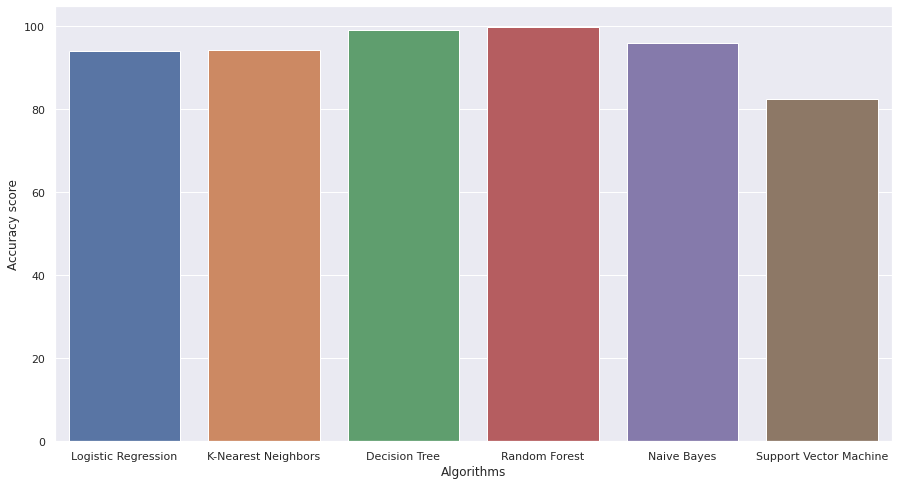

In [40]:
sns.set(rc={'figure.figsize':(15,8)})

plt.xlabel("Algorithms")
plt.ylabel("Accuracy score")

ax=sns.barplot(algorithms,scores)
ax.bar_label(ax.containers[0])

In [ ]:
plt.figure(figsize=(38,16))
sns.heatmap(df.corr(),annot=True)
plt.show()